In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import os

In [2]:
df = pd.read_csv("customer_segmentation_data.csv")  # Pastikan file ini ada di folder project kamu
df.dropna(inplace=True)

# Hitung recency
if "Purchase History" in df.columns:
    df["Purchase History"] = pd.to_datetime(df["Purchase History"])
    analysis_date = df["Purchase History"].max()
    df["Recency"] = (analysis_date - df["Purchase History"]).dt.days
else:
    df["Recency"] = 0

# Hapus kolom ID kalau ada
if "Customer ID" in df.columns:
    df.drop(columns=["Customer ID"], inplace=True)

df.head()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Recency
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5,2088
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5,1878
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3,936
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3,1943
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2,1935


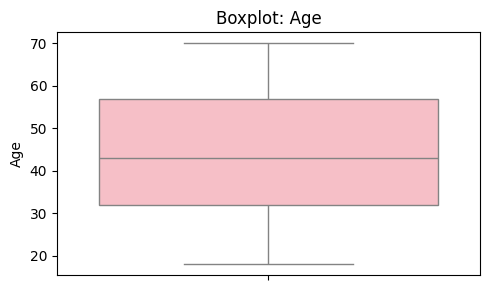

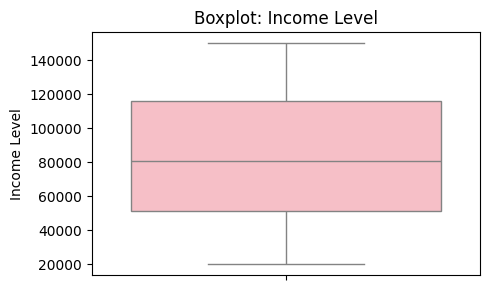

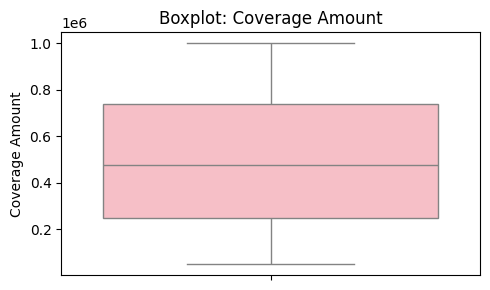

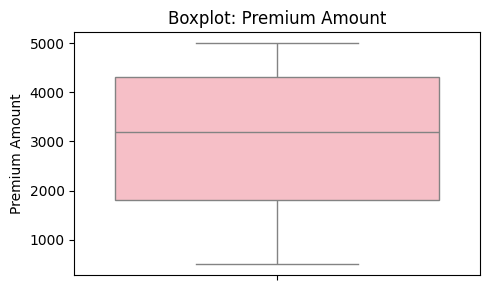

In [6]:
for col in ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, y=col, color='lightpink')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

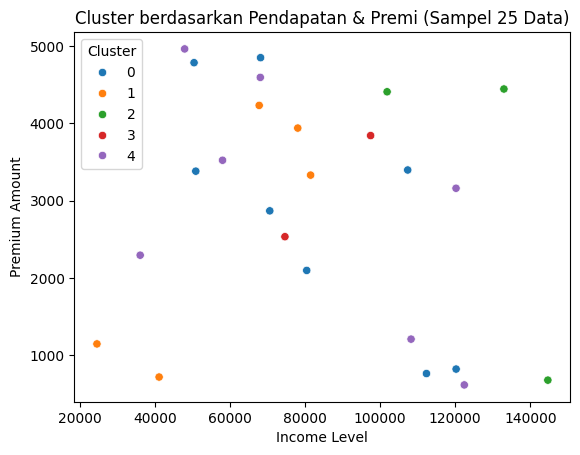

In [3]:
features = ["Age", "Income Level", "Coverage Amount", "Recency"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
if len(df) >= 25:
    df_sampled_for_plot = df.sample(n=25, random_state=42) 
else:
    df_sampled_for_plot = df 

sns.scatterplot(data=df_sampled_for_plot, x='Income Level', y='Premium Amount', hue='Cluster', palette='tab10')
plt.title("Cluster berdasarkan Pendapatan & Premi (Sampel 25 Data)")
plt.show()

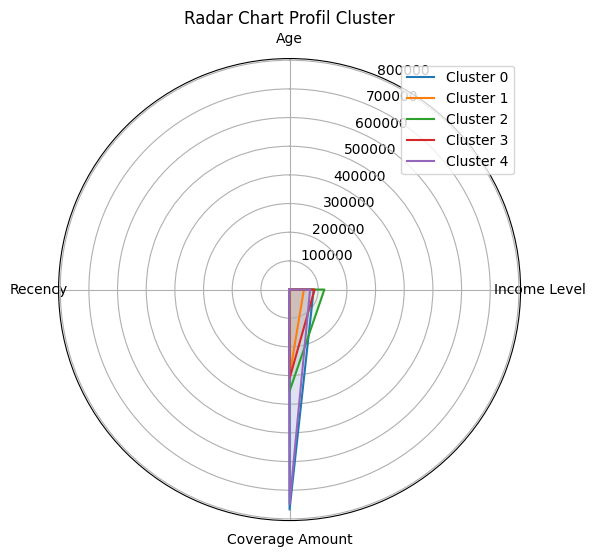

In [ ]:
cluster_profiles = df.groupby('Cluster')[features].mean()
labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, row in cluster_profiles.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right')
plt.title("Radar Chart Profil Cluster")
plt.show()

R² Score: -0.00010661284484081435
MAE: 1111.34775385847


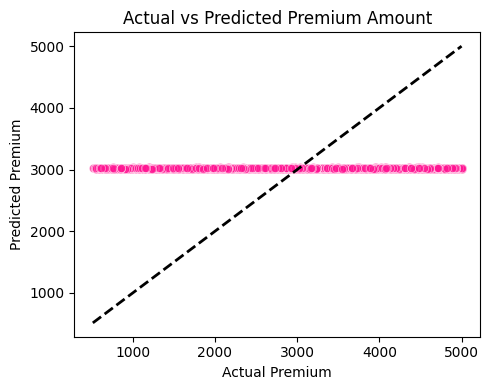

In [ ]:
X = df[features]
y = df["Premium Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

# Evaluasi
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Visualisasi prediksi vs actual
plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="deeppink")
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Actual vs Predicted Premium Amount")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
import os
os.makedirs("model", exist_ok=True)
joblib.dump(kmeans, "model/kmeans_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(reg_model, "model/reg_model.pkl")
print("✅ Model berhasil disimpan ke folder 'model'")

✅ Model berhasil disimpan ke folder 'model'
